In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('data.csv',sep=';')
df.columns=['Throughput','Latency','Buffer Level','Quality']

# Análisis de los datos 

**1. Comprobación del formato y contenido de los datos**

    Primero, se mostrarán las 5 primeras y últimas filas del dataset, para comprobar que los datos con los que trabajamos son los esperados. También se comprobará su longitud, que debe ser en este caso 199 filas, y los tipos de cada uno de los datos disponibles.
    
    Por último, se hará una primera representación de los datos, simplemente se mostrará su evolución a lo largo del tiempo que dura la simulación de la reproducción del vídeo.

In [3]:
print("Primeras 5 líneas del dataset")
df.head()

Primeras 5 líneas del dataset


,Throughput,Latency,Buffer Level,Quality
0,5000.0,75,3000.0000,0
1,5000.0,75,4311.4080,7
2,5000.0,75,5538.0544,7
3,5000.0,75,6491.8752,7
4,5000.0,75,6867.8880,8


In [4]:
print("Últimas 5 filas del dataset")
df.tail()

Últimas 5 filas del dataset


,Throughput,Latency,Buffer Level,Quality
194,3000.0,150,11250.25333,6
195,3000.0,150,12119.97067,6
196,3000.0,150,11939.85600,7
197,3000.0,150,12857.39200,6
198,3000.0,150,13374.48000,7


In [5]:
print("Número de filas del dataset:", len(df))
print("Tipos de los datos:")
df.dtypes

Número de filas del dataset: 199
Tipos de los datos:


Throughput      float64
Latency           int64
Buffer Level    float64
Quality           int64
dtype: object

Representación de los datos


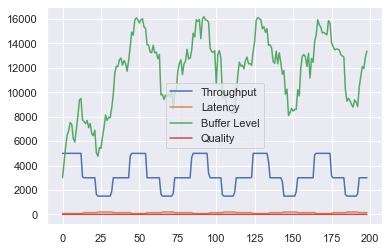

In [6]:
print("Representación de los datos")
df.plot()

Además de esta representación, visualizar las muestras de salida respecto a las de entrada puede ayudar a entender cómo se comporta la salida respecto a las diferentes entradas.

Representación de las muestras de calidad de vídeo respecto al throughput


Text(0.5, 0, 'Throughput')

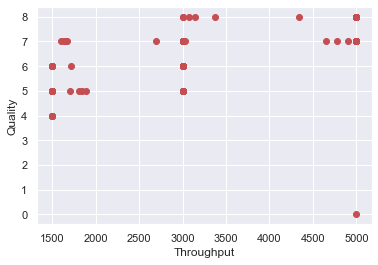

In [7]:
print("Representación de las muestras de calidad de vídeo respecto al throughput")
plt.plot(df["Throughput"],df["Quality"],"ro")
plt.ylabel("Quality")
plt.xlabel("Throughput")

Representación de las muestras de calidad de vídeo respecto a la latencia de la red


Text(0.5, 0, 'Latency')

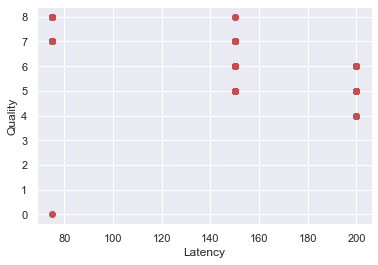

In [8]:
print("Representación de las muestras de calidad de vídeo respecto a la latencia de la red")
plt.plot(df["Latency"],df["Quality"],"ro")
plt.ylabel("Quality")
plt.xlabel("Latency")

Representación de las muestras de calidad de vídeo respecto al nivel de buffer


Text(0.5, 0, 'Buffer Level')

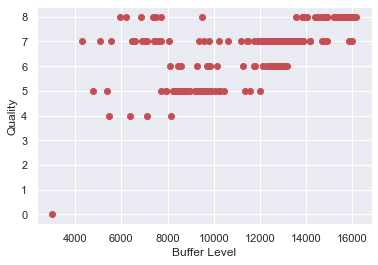

In [9]:
print("Representación de las muestras de calidad de vídeo respecto al nivel de buffer")
plt.plot(df["Buffer Level"],df["Quality"],"ro")
plt.ylabel("Quality")
plt.xlabel("Buffer Level")

**2. Cálculo y representación de métricas básicas**

    Una vez hemos comprobado que los datos se han leído correctamente, se pueden comenzar a calcular parámetros estadísticos básicos. 
    
    Para empezar, con la función describe() de la librería pandas, podemos obtener datos como la media, percentiles o la desviación media. 
    
    Se calculará y representará también la correlación entre los diferentes datos, para comprobar la relacion entre la variable de salida con las de entrada. 

In [10]:
df.describe()

,Throughput,Latency,Buffer Level,Quality
count,199.000000,199.000000,199.000000,199.000000
mean,3223.636976,139.321608,11597.047185,6.582915
std,1258.840663,45.250895,3020.377089,1.185736
min,1500.000000,75.000000,3000.000000,0.000000
25%,3000.000000,75.000000,9342.808000,6.000000
50%,3000.000000,150.000000,12358.888000,7.000000
75%,5000.000000,150.000000,13604.302665,7.000000
max,5000.000000,200.000000,16185.184000,8.000000


In [11]:
print("Correlación entre las distintas columnas del dataset:")
df.corr()

Correlación entre las distintas columnas del dataset:


,Throughput,Latency,Buffer Level,Quality
Throughput,1.000000,-0.954896,0.522654,0.675885
Latency,-0.954896,1.000000,-0.491274,-0.704673
Buffer Level,0.522654,-0.491274,1.000000,0.589639
Quality,0.675885,-0.704673,0.589639,1.000000


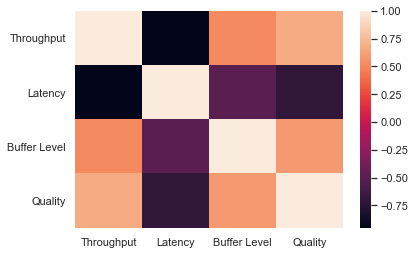

In [12]:
corr = df.corr()
sns.heatmap(corr,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

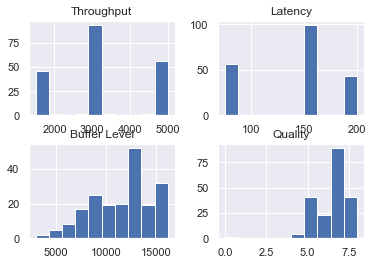

In [13]:
df.hist()
plt.show()

In [18]:
X = df.drop(columns=['Quality'])
y = df.loc[:,"Quality"]

#Separamos las muestras para entrenamiento y test
X_train = X[:int(len(X)*0.8)]
y_train = y[:int(len(y) * 0.8)]

X_test = X[int(len(X)*0.8):]
y_test = y[int(len(y) * 0.8):]

# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
print("Coeficientes obtenidos: ", regr.coef_)

#Hacemos las predicciones ¿Redondeo? 
y_pred = regr.predict(X_test)

#Imprimimos los resultados
print("Calidades predichas: ", y_pred.round(0))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


Coeficientes obtenidos:  [-0.00019197 -0.01947368  0.00013016]
Calidades predichas:  [7. 7. 6. 7. 7. 6. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 7. 6. 7. 7.]
Mean squared error: 0.27
